In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn

     |████████████████████████████████| 9.9 MB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 15.3 MB 49.2 MB/s eta 0:00:01
     |████████████████████████████████| 11.5 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 47.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 31.2 MB/s eta 0:00:01
     |████████████████████████████████| 285 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 27.4 MB 9.6 MB/s eta 0:00:01
     |████████████████████████████████| 22.3 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 46.1 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=c581d124639dfb4dc5c96825e811138c1dc2d7b9d0ef5fbbc8eb5e3bfdbccf42
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

In [2]:
#Leer el data set
dataframe = pd.read_csv(r"UNSW-NB15_1Cp.csv",sep=',', low_memory=False)

In [3]:
dataframe.iloc[:5,:10]

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31


In [10]:
print(dataframe.groupby('dsport').size())

dsport
-49320         54
-1              7
538989345       2
0            9673
10000           4
             ... 
9995            3
9996            7
9997            5
9998            1
9999            7
Length: 62222, dtype: int64


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


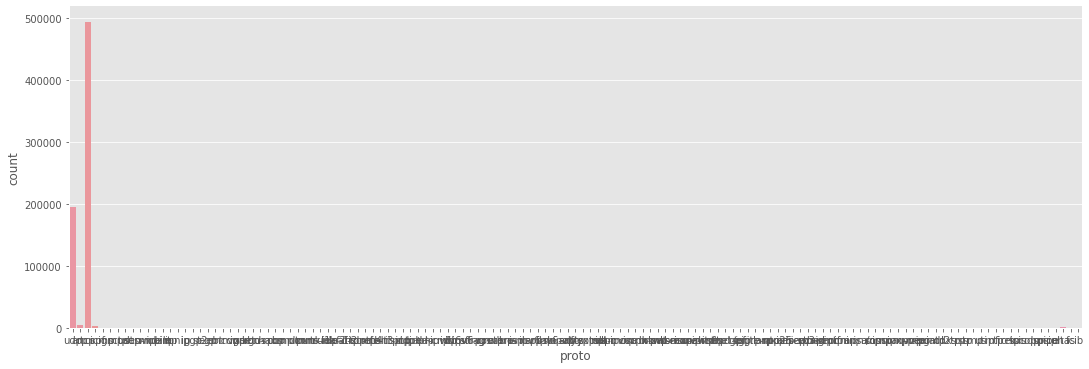

In [5]:
sb.catplot('proto',data=dataframe,kind="count", aspect=3)

In [8]:
dataframe['sport'].unique().tolist()

['1390',
 '33661',
 '1464',
 '3593',
 '49664',
 '32119',
 '2142',
 '0',
 '40726',
 '12660',
 '48847',
 '24266',
 '10393',
 '62539',
 '21270',
 '8989',
 '49346',
 '21223',
 '23357',
 '13284',
 '4192',
 '26872',
 '24946',
 '5685',
 '22848',
 '28565',
 '46719',
 '25100',
 '29704',
 '36998',
 '6438',
 '1416',
 '35578',
 '38902',
 '9897',
 '44759',
 '13792',
 '26939',
 '58304',
 '7419',
 '12527',
 '52335',
 '39558',
 '47526',
 '54634',
 '26778',
 '60756',
 '25689',
 '16931',
 '15133',
 '58771',
 '13903',
 '24551',
 '10510',
 '39500',
 '29309',
 '31564',
 '44119',
 '41515',
 '32716',
 '40309',
 '47061',
 '29622',
 '30507',
 '56644',
 '49910',
 '36701',
 '15807',
 '57983',
 '62824',
 '26719',
 '57137',
 '19393',
 '61089',
 '23910',
 '44762',
 '4159',
 '13987',
 '34944',
 '40146',
 '4864',
 '35110',
 '6379',
 '62676',
 '53247',
 '61452',
 '16859',
 '30521',
 '1809',
 '37848',
 '53697',
 '43850',
 '45430',
 '39128',
 '4318',
 '14309',
 '45898',
 '17491',
 '37437',
 '51164',
 '60615',
 '59256',


In [5]:
dataframe.dtypes

id                    int64
srcip                object
sport                object
dstip                object
dsport               object
proto                object
state                object
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service              object
Sload               float64
Dload               float64
Spkts                 int64
Dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smeansz               int64
dmeansz               int64
trans_depth           int64
res_bdy_len           int64
Sjit                float64
Djit                float64
Stime                 int64
Ltime                 int64
Sintpkt             float64
Dintpkt             float64
tcprtt              float64
synack              float64
ackdat              

In [4]:
#Pasar de categorico a numerico
le = preprocessing.LabelEncoder()
le.fit(["-","dhcp","dns","ftp","ftp-data","http","irc","pop3","radius","smtp","snmp","ssh","ssl"])
service_transform = le.transform(dataframe['service'].values)
dataframe.drop(['service'], axis=1)
del dataframe['service']
dataframe.insert(13, 'service', service_transform)

In [5]:
#Pasar de categorico a numerico
le2 = preprocessing.LabelEncoder()
le2.fit(["ACC" ,"CLO" ,  "CON" , "ECO"  ,"ECR" ,"FIN","INT" , "MAS","PAR","REQ","RST","TST","TXD","URH","URN","no"])
service_transform = le2.transform(dataframe['state'].values)
dataframe.drop(['state'], axis=1)
del dataframe['state']
dataframe.insert(5, 'state', service_transform)

In [6]:
#Pasar de categorico a numerico
le3 = preprocessing.LabelEncoder()
le3.fit(['udp', 'arp', 'tcp', 'ospf', 'icmp', 'igmp', 'sctp', 'udt', 'sep', 'sun-nd', 'swipe', 'mobile', 'pim', 'rtp', 'ipnip', 'ip', 'ggp', 
'st2', 'egp', 'cbt', 'emcon', 'nvp', 'igp', 'xnet', 'argus', 'bbn-rcc', 'chaos', 'pup', 'hmp', 'mux', 'dcn', 'prm', 'trunk-1', 'xns-idp', 
'trunk-2', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'iso-tp4', 'netblt', 'mfe-nsp', 'merit-inp', '3pc', 'xtp', 'idpr', 'tp++', 'ddp', 'idpr-cmtp',
'ipv6', 'il', 'idrp', 'ipv6-frag', 'sdrp', 'ipv6-route', 'gre', 'rsvp', 'mhrp', 'bna', 'esp', 'i-nlsp', 'narp', 'ipv6-no', 'tlsp', 'skip',
 'ipv6-opts', 'any', 'cftp', 'sat-expak', 'kryptolan', 'rvd', 'ippc', 'sat-mon', 'ipcv', 'visa', 'cpnx', 'cphb', 'wsn', 'pvp', 'br-sat-mon',
 'wb-mon', 'wb-expak', 'iso-ip', 'secure-vmtp', 'vmtp', 'vines', 'ttp', 'nsfnet-igp', 'dgp', 'tcf', 'eigrp', 'sprite-rpc', 'larp', 'mtp', 
'ax.25', 'ipip', 'micp', 'aes-sp3-d', 'encap', 'etherip', 'pri-enc', 'gmtp', 'pnni', 'ifmp', 'aris', 'qnx', 'a/n', 'scps', 'snp', 'ipcomp',
 'compaq-peer', 'ipx-n-ip', 'vrrp', 'zero', 'pgm', 'iatp', 'ddx', 'l2tp', 'srp', 'stp', 'smp', 'uti', 'sm', 'ptp', 'fire', 'crtp', 'isis', 
'crudp', 'sccopmce', 'sps', 'pipe', 'iplt', 'unas', 'fc', 'ib'])
service_transform = le3.transform(dataframe['proto'].values)
dataframe.drop(['proto'], axis=1)
del dataframe['proto']
dataframe.insert(4, 'proto', service_transform)

In [7]:
#Pasar de categorico a numerico
ipsouce = dataframe['srcip'].values
i=0
for ip in ipsouce:
    linea = str(ip).split('.')
    ipcompleta = ""
    for li in linea :
        li =li.zfill(3)
        ipcompleta = ipcompleta + li
    ipsouce[i]=int(ipcompleta)
    i+=1
dataframe.drop(['srcip'], axis=1)
del dataframe['srcip']
dataframe.insert(0, 'srcip', ipsouce)


In [8]:
#Pasar de categorico a numerico
ipsouce = dataframe['dstip'].values
i=0
for ip in ipsouce:
    linea = str(ip).split('.')
    ipcompleta = ""
    for li in linea :
        li =li.zfill(3)
        ipcompleta = ipcompleta + li
    ipsouce[i]=int(ipcompleta)
    i+=1
dataframe.drop(['dstip'], axis=1)
del dataframe['dstip']
dataframe.insert(2, 'dstip', ipsouce)

In [9]:
#Limpiar puertos origen

listPos = np.where( dataframe.sport=='-')
for pos in listPos:
     dataframe.at[pos,'sport']=-1

listPos = np.where( dataframe.sport=='0x000b')
for pos in listPos:
     dataframe.at[pos,'sport']=-11

listPos = np.where( dataframe.sport=='0x000c')
for pos in listPos:
     dataframe.at[pos,'sport']=-12

#Limpiar puertos Destino
listPos = np.where( dataframe.dsport=='-')
for pos in listPos:
     dataframe.at[pos,'dsport']=-1

listPos = np.where( dataframe.dsport=='0x20205321')
for pos in listPos:
     dataframe.at[pos,'dsport']=538989345
    
listPos = np.where( dataframe.dsport=='0xc0a8')
for pos in listPos:
     dataframe.at[pos,'dsport']=-49320

In [11]:
X = dataframe.iloc[:,1:47].values
y = dataframe['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
n_neighbors = 7

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
      .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
      .format(knn.score(X_test, y_test)))